## Intro 
In the first task, voting is introduced as a basement method for ensembling predictions.

Voting method is wildly used in various scenes especially when the results are expected to be accurate as much as possible.The hypothesis beyond voting method is that the integrated results of multiple models should perform better than a single model. 

In following paragraph, an experiment will be applied on credit card dataset by creating a voting model, aimed to predicted whether an applyment should be approved.

In [7]:
import pandas as pd  
import numpy as np  
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
%matplotlib inline
#loading the dataset (you have first to download the datasets from Kaggle
df_train = pd.read_csv("Dataset/train.csv")
df_test = pd.read_csv("Dataset/test.csv")

In [8]:
df_train
# include id, features and Category

,Id,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,Category
0,487,1,24.500000,13.335,2,2,0,7,0.040,0,0,0,0,475,1
1,424,1,33.670000,2.165,1,0,1,7,1.500,0,0,0,1,0,1
2,608,1,31.568171,0.040,2,2,3,7,4.250,0,0,0,0,0,1
3,61,1,31.670000,16.165,1,0,3,7,3.000,1,1,9,0,730,0
4,631,0,27.250000,0.290,1,0,9,3,0.125,0,1,1,0,108,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,71,1,34.830000,4.000,1,0,3,0,12.500,1,0,0,0,0,1
536,106,1,28.750000,1.165,1,0,8,7,0.500,1,0,0,2,0,1
537,270,1,37.580000,0.000,1,0,1,7,0.000,0,0,0,1,0,0
538,435,1,19.000000,0.000,2,2,5,2,0.000,0,1,4,0,1,1


In [9]:
id_person=df_train.iloc[:,0].values # column of customer id
X = df_train.iloc[:,1:-1].values # column of the inputs
y = df_train.iloc[:,-1].values # column of the output

The voting model is ensembled with 
1. logistic Regression model
2. SVM model
3. simple layer MLP classifier
4. KNN model with n=9

In [10]:
# get a voting ensemble of models
def get_voting():
    # define the base models
    models = list()
    models.append(('lr',make_pipeline(StandardScaler(),LogisticRegression())))
    models.append(('svm',make_pipeline(StandardScaler(),SVC())))
    models.append(('mlp',MLPClassifier(hidden_layer_sizes=(5,), alpha=0.0001, max_iter=300000,activation="relu",solver="lbfgs")))
    models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble

In [11]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = make_pipeline(StandardScaler(),LogisticRegression())
    models['svm'] = make_pipeline(StandardScaler(),SVC())
    models['mlp'] = MLPClassifier(hidden_layer_sizes=(5,), alpha=0.0001, max_iter=300000,activation="relu",solver="lbfgs")
    models['knn9'] = KNeighborsClassifier(n_neighbors=9)
    models['hard_voting'] = get_voting()
    return models

In [12]:
# evaluate a give model using cross-validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score   #Added by ljq
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.862 (0.040)
>svm 0.858 (0.042)
>mlp 0.790 (0.113)
>knn9 0.741 (0.060)
>hard_voting 0.852 (0.045)


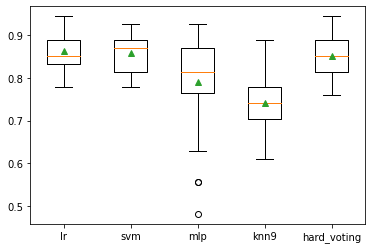

In [13]:
# get the models to evaluate
from numpy import mean
from numpy import std
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

LR yyds!